# Homework 5, Part 2: Answer questions with pandas

**Use the Excel file to answer the following questions.** This is a little more typical of what your data exploration will look like with pandas.

## 0) Setup

Import pandas **with the correct name** and set `matplotlib` to always display graphics in the notebook.

In [1]:
import pandas
%matplotlib inline

## 1) Reading in an Excel file

Use pandas to read in the `richpeople.xlsx` Excel file, saving it as a variable with the name we'll always use for a dataframe.

> **TIP:** You will use `read_excel` instead of `read_csv`, *but you'll also need to install a new library*. You might need to restart your kernel afterward!

In [2]:
type(pandas.read_excel('richpeople.xlsx'))
df = type(pandas.read_excel('richpeople.xlsx'))
df = pandas.read_excel('richpeople.xlsx')

## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [4]:
df.shape

(1653, 30)

In [5]:
df.dtypes

year                         int64
name                        object
rank                         int64
citizenship                 object
countrycode                 object
networthusbillion          float64
selfmade                    object
typeofwealth                object
gender                      object
age                        float64
industry                    object
IndustryAggregates          object
region                      object
north                        int64
politicalconnection        float64
founder                      int64
generationofinheritance     object
sector                      object
company                     object
companytype                 object
relationshiptocompany       object
foundingdate               float64
gdpcurrentus               float64
sourceofwealth              object
notes                       object
notes2                      object
source                      object
source_2                    object
source_3            

## 3) Who are the top 10 richest billionaires? Use the `networthusbillion` column.

In [9]:
df.sort_values(by='networthusbillion').head(10)

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
156,2014,B.R. Shetty,1565,India,IND,1.0,self-made,founder non-finance,male,72.0,...,founder,1975.0,NaN,healthcare,NaN,NaN,http://en.wikipedia.org/wiki/B._R._Shetty,http://www.nmchealth.com/dr-br-shetty/,NaN,NaN
1310,2014,Rostam Azizi,1565,Tanzania,TZA,1.0,self-made,executive,male,49.0,...,investor,1999.0,NaN,"telecom, investments",NaN,NaN,http://www.forbes.com/profile/rostam-azizi/,http://en.wikipedia.org/wiki/Vodacom_Tanzania,http://www.thecitizen.co.tz/News/Rostam--Dewji...,NaN
1497,2014,Tory Burch,1565,United States,USA,1.0,self-made,founder non-finance,female,47.0,...,founder,2004.0,NaN,fashion,NaN,NaN,http://en.wikipedia.org/wiki/J._Christopher_Burch,http://www.vanityfair.com/news/2007/02/tory-bu...,NaN,NaN
476,2014,Fred Chang,1565,United States,USA,1.0,self-made,founder non-finance,male,57.0,...,founder,2001.0,NaN,online retailing,NaN,NaN,http://en.wikipedia.org/wiki/Newegg,http://www.newegg.com/Info/FactSheet.aspx,http://www.forbes.com/sites/andreanavarro/2014...,NaN
115,2014,Angela Bennett,1565,Australia,AUS,1.0,inherited,inherited,female,69.0,...,relation,1955.0,NaN,mining,inherited from father,shared fortune with brother,http://www.forbes.com/profile/angela-bennett/,NaN,NaN,NaN
485,2014,Fu Kwan,1565,China,CHN,1.0,self-made,self-made finance,male,56.0,...,chairman,1990.0,NaN,diversified,NaN,NaN,http://www.forbes.com/profile/fu-kwan/,http://www.macrolink.com.cn/en/AboutBig.aspx,NaN,NaN
1318,2014,Ryan Kavanaugh,1565,United States,USA,1.0,self-made,founder non-finance,male,39.0,...,founder,2004.0,NaN,Movies,NaN,NaN,http://en.wikipedia.org/wiki/Ryan_Kavanaugh,http://en.wikipedia.org/wiki/Relativity_Media,http://www.vanityfair.com/news/2010/03/kavanau...,NaN
1133,2014,O. Francis Biondi,1565,United States,USA,1.0,self-made,self-made finance,male,49.0,...,founder,1995.0,NaN,hedge fund,NaN,NaN,http://www.forbes.com/profile/o-francis-biondi/,http://www.forbes.com/sites/nathanvardi/2014/0...,NaN,NaN
859,2014,Lam Fong Ngo,1565,Macau,MAC,1.0,self-made,self-made finance,female,NaN,...,Vice Chairman,1997.0,NaN,casinos,NaN,NaN,http://www.forbes.com/profile/david-chow-1/,http://www.macaulegend.com/html/about_mileston...,Macau Legend to roll the dice on HK IPO; But l...,NaN
456,2014,Feng Hailiang,1565,China,CHN,1.0,self-made,founder non-finance,male,53.0,...,founder,1989.0,NaN,copper processing & real estate,NaN,NaN,http://www.forbes.com/profile/feng-hailiang/,http://www.hailiang.com/en/about_int.php,NaN,NaN


## 4) How many male billionaires are there compared to the number of female billionares? What percent is that? Do they have a different average wealth?

> **TIP:** The last part uses `groupby`, but the count/percent part does not.
> **TIP:** When I say "average," you can pick what kind of average you use.

In [16]:
df.gender.value_counts()

male      1473
female     180
Name: gender, dtype: int64

In [19]:
df.gender.value_counts(normalize=True)*100

male      89.110708
female    10.889292
Name: gender, dtype: float64

In [15]:
FMbillionaires = df.groupby('gender').networthusbillion.mean()
print (FMbillionaires)

gender
female    3.920556
male      3.902716
Name: networthusbillion, dtype: float64


## 5) What is the most common source/type of wealth? Is it different between males and females?

> **TIP:** You know how to `groupby` and you know how to count how many times a value is in a column. Can you put them together???
> **TIP:** Use percentages for this, it makes it a lot more readable.

In [35]:
df.groupby('gender').sourceofwealth.value_counts(ascending= False, normalize=True)*100

gender  sourceofwealth                   
female  diversified                          5.232558
        real estate                          4.069767
        media                                3.488372
        construction                         2.906977
        consumer goods                       2.906977
        hotels, investments                  2.906977
        Wal-Mart                             2.325581
        casinos                              2.325581
        chemicals                            2.325581
        cleaning products                    2.325581
        Samsung                              1.744186
        banking                              1.744186
        commodities                          1.744186
        mining                               1.744186
        packaging                            1.744186
        pipelines                            1.744186
        retail                               1.744186
        Campbell Soup                   

## 6) What companies have the most billionaires? Graph the top 5 as a horizontal bar graph.

> **TIP:** First find the answer to the question, then just try to throw `.plot()` on the end
>
> **TIP:** You can use `.head()` on *anything*, not just your basic `df`
>
> **TIP:** You might feel like you should use `groupby`, but don't! There's an easier way to count.
>
> **TIP:** Make the largest bar be at the top of the graph
>
> **TIP:** If your chart seems... weird, think about where in the process you're sorting vs using `head`

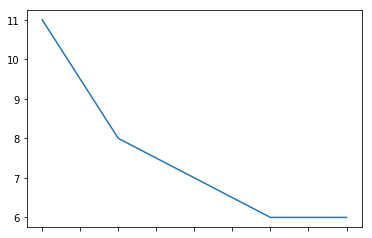

In [41]:
df.company.value_counts().head(5).plot()

## 7) How much money do these billionaires have in total?

In [43]:
df.networthusbillion.sum()

6454.400000000001

## 8) What are the top 10 countries with the most money held by billionaires?

I am **not** asking which country has the most billionaires - this is **total amount of money per country.**

> **TIP:** Think about it in steps - "I want them organized by country," "I want their net worth," "I want to add it all up," and "I want 10 of them." Just chain it all together.

In [44]:
df.groupby('countrycode').networthusbillion.sum().sort_values(ascending= False).head(10)
                                                                        

countrycode
USA    2322.4
RUS     422.5
DEU     401.4
CHN     375.8
FRA     235.3
HKG     213.7
BRA     192.2
IND     191.9
ITA     158.1
GBR     152.0
Name: networthusbillion, dtype: float64

## 9) How old is an average billionaire? How old are self-made billionaires  vs. non self-made billionaires? 

In [45]:
df.age.mean()

63.34213836477988

In [49]:
df.groupby('selfmade').age.mean()

selfmade
inherited    64.962185
self-made    62.625899
Name: age, dtype: float64

## 10) Who are the youngest billionaires? Who are the oldest? Make a graph of the distribution of ages.

> **TIP:** You use `.plot()` to graph values in a column independently, but `.hist()` to draw a [histogram](https://www.mathsisfun.com/data/histograms.html) of the distribution of their values

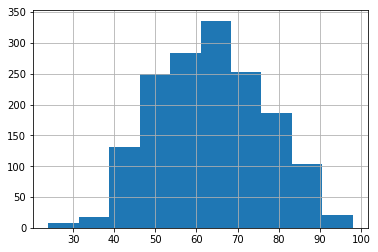

In [56]:
df.age.hist()

In [65]:
df.sort_values('age', ascending=False)

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
343,2014,"David Rockefeller, Sr.",580,United States,USA,2.9,inherited,inherited,male,98.0,...,relation,1870.0,NaN,"oil, banking",family made most of fortune in the late 19th a...,NaN,http://en.wikipedia.org/wiki/David_Rockefeller,http://en.wikipedia.org/wiki/Standard_Oil,http://en.wikipedia.org/wiki/Rockefeller_family,NaN
816,2014,Karl Wlaschek,305,Austria,AUT,4.8,self-made,founder non-finance,male,96.0,...,founder,1953.0,NaN,retail,NaN,NaN,http://en.wikipedia.org/wiki/BILLA,http://en.wikipedia.org/wiki/Karl_Wlaschek,https://www.billa.at/Footer_Nav_Seiten/Geschic...,NaN
836,2014,Kirk Kerkorian,328,United States,USA,4.5,self-made,self-made finance,male,96.0,...,investor,1924.0,NaN,"casinos, investments",purchased in 1969,NaN,http://en.wikipedia.org/wiki/Kirk_Kerkorian,http://www.forbes.com/profile/kirk-kerkorian/,PROFILE: Las Vegas billionaire amassed his wea...,NaN
588,2014,Henry Hillman,687,United States,USA,2.5,inherited,inherited,male,95.0,...,relation,1942.0,NaN,investments,inherited from father,NaN,http://www.forbes.com/profile/henry-hillman/,http://en.wikipedia.org/wiki/Calgon_Carbon,NaN,NaN
435,2014,Erika Pohl-Stroher,1154,Germany,DEU,1.5,inherited,inherited,female,95.0,...,relation,1880.0,NaN,hair products,3rd generation,23% stake in the company,http://www.forbes.com/profile/erika-pohl-stroher/,http://en.wikipedia.org/wiki/Wella,NaN,NaN
1428,2014,Sulaiman Al Rajhi,931,Saudi Arabia,SAU,1.9,self-made,self-made finance,male,94.0,...,founder,1957.0,NaN,banking,NaN,NaN,http://en.wikipedia.org/wiki/Al-Rajhi_Bank,http://www.alrajhibank.com.sa/ar/investor-rela...,http://www.alrajhibank.com.sa/ar/about-us/page...,NaN
122,2014,Anne Cox Chambers,58,United States,USA,15.5,inherited,inherited,female,94.0,...,relation,1898.0,NaN,media,inherited from brother,NaN,http://en.wikipedia.org/wiki/Anne_Cox_Chambers,http://www.forbes.com/lists/2010/10/billionair...,http://www.nytimes.com/2007/05/30/business/med...,NaN
815,2014,Karl Albrecht,23,Germany,DEU,25.0,self-made,executive,male,94.0,...,relation,1914.0,NaN,retail,"(split from Aldi Nord in 1966, but both branch...",took over mother's single grocerty store,http://en.wikipedia.org/wiki/Karl_Albrecht,http://www.bloomberg.com/news/articles/2014-07...,http://aldiuscareers.com/about-aldi/history,NaN
77,2014,Aloysio de Andrade Faria,483,Brazil,BRA,3.3,inherited,inherited,male,93.0,...,relation,1925.0,NaN,banking,inherited from father,NaN,http://en.wikipedia.org/wiki/Aloysio_de_Andrad...,http://en.wikipedia.org/wiki/Banco_da_Lavoura_...,http://www.forbes.com/profile/aloysio-de-andra...,NaN
1560,2014,Wang Yung-Tsai,520,Taiwan,Taiwan,3.1,self-made,founder non-finance,male,93.0,...,founder,1954.0,NaN,plastics,NaN,NaN,http://www.forbes.com/profile/wang-yung-tsai/,What's good for the goose South China Morning ...,NaN,NaN


In [66]:
df.sort_values('age', ascending=True)

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
1172,2014,Perenna Kei,1284,Hong Kong,HKG,1.3,inherited,inherited,female,24.0,...,relation,1996.0,NaN,real estate,inherited from father,NaN,http://en.wikipedia.org/wiki/Perenna_Kei,http://www.loganestate.com/en/about.aspx?ftid=294,NaN,NaN
397,2014,Dustin Moskovitz,202,United States,USA,6.8,self-made,founder non-finance,male,29.0,...,founder,2004.0,NaN,Facebook,NaN,NaN,http://en.wikipedia.org/wiki/Dustin_Moskovitz,http://www.forbes.com/profile/dustin-moskovitz/,https://www.facebook.com/facebook/info?tab=pag...,NaN
1004,2014,Mark Zuckerberg,21,United States,USA,28.5,self-made,founder non-finance,male,29.0,...,founder,2004.0,NaN,Facebook,NaN,NaN,http://www.forbes.com/profile/mark-zuckerberg/,NaN,NaN,NaN
127,2014,"Anton Kathrein, Jr.",1270,Germany,DEU,1.4,inherited,inherited,male,29.0,...,relation,1919.0,NaN,antennas,3rd generation,NaN,http://www.forbes.com/profile/anton-kathrein-jr/#,NaN,NaN,NaN
394,2014,Drew Houston,1372,United States,USA,1.2,self-made,founder non-finance,male,30.0,...,founder,2007.0,NaN,Dropbox,NaN,NaN,http://en.wikipedia.org/wiki/Drew_Houston,http://en.wikipedia.org/wiki/Dropbox_(service),http://www.forbes.com/profile/drew-houston/,NaN
28,2014,Albert von Thurn und Taxis,1092,Germany,DEU,1.6,inherited,inherited,male,30.0,...,relation,1615.0,NaN,diversified,"monopoly on postal service in germany, nationa...","two older sisters, did not inherit title becau...",http://en.wikipedia.org/wiki/Thurn_und_Taxis,"http://en.wikipedia.org/wiki/Albert,_12th_Prin...",NaN,NaN
406,2014,Eduardo Saverin,367,Brazil,BRA,4.1,self-made,founder non-finance,male,31.0,...,founder,2004.0,NaN,Facebook,NaN,NaN,http://en.wikipedia.org/wiki/Eduardo_Saverin,http://www.bloomberg.com/news/articles/2012-05...,NaN,NaN
1340,2014,Scott Duncan,215,United States,USA,6.3,inherited,inherited,male,31.0,...,relation,1968.0,NaN,pipelines,inherited from father,NaN,http://en.wikipedia.org/wiki/Scott_Duncan_(bus...,http://www.forbes.com/profile/dannine-avara/,NaN,NaN
1607,2014,Yang Huiyan,196,China,CHN,6.9,inherited,inherited,female,32.0,...,relation,1997.0,NaN,real estate,inherited from father,NaN,http://en.wikipedia.org/wiki/Yang_Huiyan,NaN,NaN,NaN
991,2014,Marie Besnier Beauvalot,642,France,FRA,2.7,inherited,inherited,female,33.0,...,relation,1933.0,NaN,cheese,inherited from father,oldest brother is CEO,http://www.forbes.com/profile/emmanuel-besnier/,http://en.wikipedia.org/wiki/Lactalis,NaN,NaN


## 11) Make a scatterplot of net worth compared to age

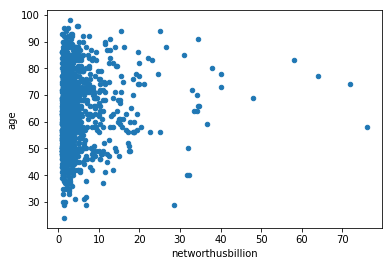

In [52]:
df.plot(x='networthusbillion', y='age', kind='scatter')

## 13) Make a bar graph of the wealth of the top 10 richest billionaires

> **TIP:** When you make your plot, you'll need to set the `x` and `y` or else your chart will look _crazy_
>
> **TIP:** x and y might be the opposite of what you expect them to be

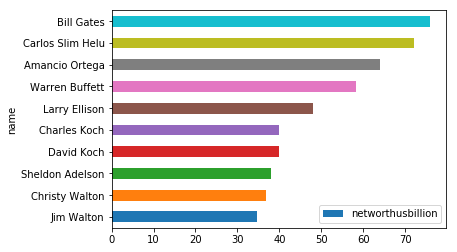

In [69]:
sorted_billionaires = df.sort_values('networthusbillion')
sorted_billionaires.sort_values(by='networthusbillion', ascending=True).tail(10).plot(x='name',y='networthusbillion',kind='barh')